<a href="https://colab.research.google.com/github/sanhiitaa/salary-prediction/blob/main/salary_prediction_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import pandas as pd
import numpy as np


In [2]:
# loading the data
df=pd.read_csv('D:/data/DS_salary.csv')
#
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [3]:
df.shape

(2639, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


13 columns in total, there are null values in some columns, 4 features with float values, 2 with integer values and 7 with categorical type values.

In [5]:
# duplicated values
df.duplicated().sum()

161

In [6]:
# dropping duplicates
df=df.drop_duplicates()

In [7]:
# checking for null values
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

# data preprocessing

In [8]:
# imputing below columns with mode
cols_mode=['DOJ', 'AGE', 'RATINGS']
for col in cols_mode:
  df[col]=df[col].fillna(df[col].mode()[0])


In [9]:
# imputing below columns with median
cols_median=['LEAVES USED', 'LEAVES REMAINING']
for col in cols_median:
  df[col]=df[col].fillna(df[col].median())

In [10]:
# dropping columns insignificant for analysis
cols_drop=['FIRST NAME', 'LAST NAME']
df=df.drop(columns=cols_drop)

In [11]:
df.isnull().sum()

SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

# feature engineering

In [12]:
# converting date columns to datetime datatype
cols_date=['DOJ', 'CURRENT DATE']
for col in cols_date:
  df[col]=pd.to_datetime(df[col])

In [13]:
# making a new feature: years_experience
df['years_experience']=df['CURRENT DATE'].dt.year-df['DOJ'].dt.year

In [14]:
# dropping date columns
df.drop(columns=cols_date, inplace=True)

In [15]:
df.sample(20)

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,years_experience
2552,M,Analyst,21.0,41854,Operations,29.0,1.0,5.0,0,2
1867,M,Manager,32.0,135210,Web,18.0,12.0,2.0,4,5
1847,F,Senior Analyst,25.0,55980,IT,18.0,12.0,2.0,0,4
668,F,Analyst,24.0,49849,Web,30.0,0.0,4.0,1,3
903,F,Analyst,22.0,43569,Finance,27.0,3.0,2.0,0,2
791,M,Analyst,21.0,41386,Web,19.0,11.0,4.0,0,3
978,M,Analyst,22.0,45633,Management,26.0,4.0,5.0,0,3
1625,M,Analyst,22.0,43481,Management,15.0,15.0,4.0,0,2
715,M,Analyst,22.0,47850,IT,22.0,8.0,3.0,0,2
2440,M,Analyst,23.0,48049,IT,27.0,3.0,5.0,0,3


<h2>Data Preprocessing

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
# descriptive statistics
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,years_experience
count,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000
mean,24.727603,58076.235270,22.493140,7.511703,3.480630,1.560129,2.662228
std,3.910233,36786.661873,4.596052,4.595603,1.116285,2.706363,0.880481
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000,1.000000
25%,22.000000,43401.250000,19.000000,4.000000,2.000000,0.000000,2.000000
50%,24.000000,46733.500000,22.000000,8.000000,3.000000,1.000000,3.000000
75%,25.000000,50323.750000,26.000000,11.000000,4.000000,2.000000,3.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000,7.000000


In [18]:
cat_cols= [x for x in df.columns if df[x].dtype == 'object']
cat_cols

['SEX', 'DESIGNATION', 'UNIT']

<Axes: xlabel='SEX'>

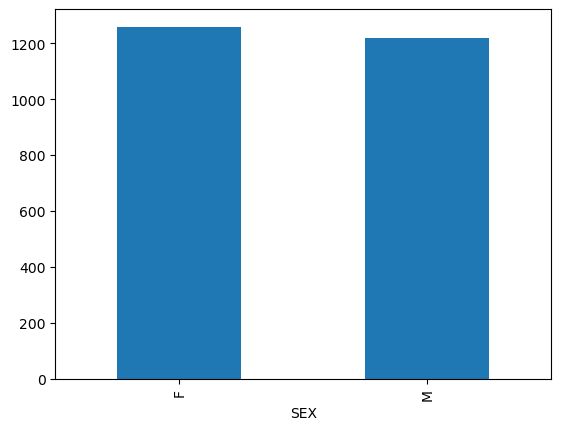

In [19]:
# gender distribution
df['SEX'].value_counts().plot(kind='bar')

<Axes: xlabel='DESIGNATION'>

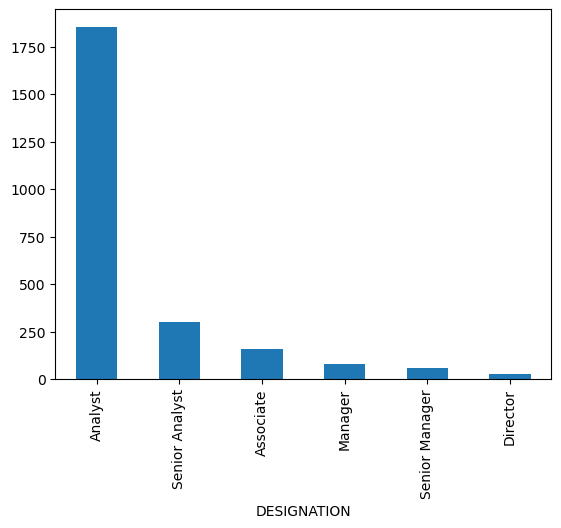

In [20]:
# designation distribution
df['DESIGNATION'].value_counts().plot(kind='bar')


<Axes: xlabel='UNIT'>

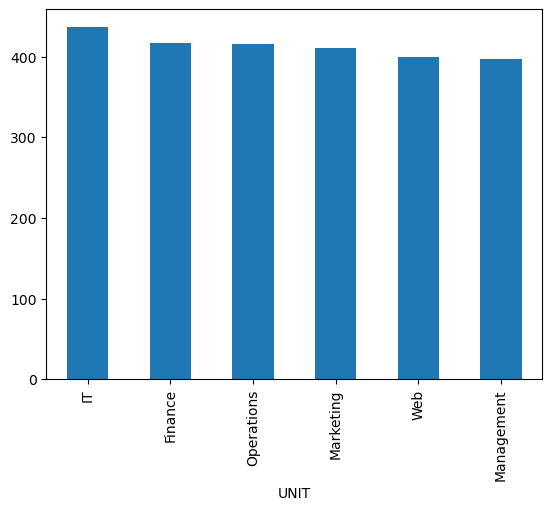

In [21]:
# unit distribution
df['UNIT'].value_counts().plot(kind='bar')

<Axes: >

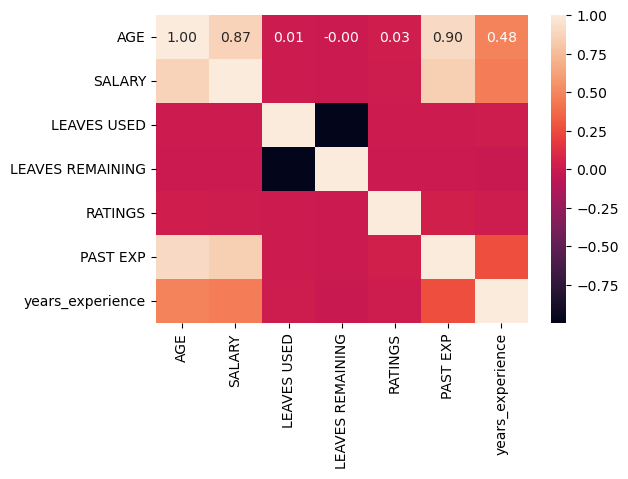

In [22]:
plt.figure(figsize=(6, 4))
corr=df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f")

<h2> Model Tranning

In [23]:
# data preparation libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_regression

# model training libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# metric library
from sklearn import metrics

# setting a random seed for reproducability
np.random.seed(1111)

In [24]:
# splitting the data into dependent and independent variables
X=df.drop('SALARY',axis=1)
y=df['SALARY']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
# label encoding sex and unit column
label_cols=['SEX', 'UNIT']
for cols in label_cols:
  le=LabelEncoder()
  x_train[cols]= le.fit_transform(x_train[cols])
  x_test[cols]= le.transform(x_test[cols])

In [27]:
# ordinal encoding designation column
desired_order=[['Analyst', 'Associate', 'Senior Analyst', 'Manager', 'Senior Manager', 'Director']]
ordinal_encoder = OrdinalEncoder(categories=desired_order)
x_train['DESIGNATION'] = ordinal_encoder.fit_transform(x_train[['DESIGNATION']])
x_test['DESIGNATION'] = ordinal_encoder.transform(x_test[['DESIGNATION']])

In [28]:
x_train.head()

,SEX,DESIGNATION,AGE,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,years_experience
657,0,0.0,25.0,1,24.0,6.0,3.0,1,3
1101,1,0.0,22.0,3,24.0,6.0,2.0,0,2
245,0,0.0,25.0,1,27.0,3.0,5.0,1,3
2188,1,0.0,25.0,3,26.0,4.0,2.0,2,3
1863,1,0.0,23.0,0,23.0,7.0,3.0,0,3


In [29]:
# selecting best 6 features
selector= SelectKBest(score_func = f_regression, k=6)
x_train_new = selector.fit_transform(x_train, y_train)
x_test_new = selector.transform(x_test)
# extracting feature names
selector.get_feature_names_out()
# reassigning the selected features to training and test dataset
x_train_new= pd.DataFrame(x_train_new, columns=selector.get_feature_names_out())
x_test_new= pd.DataFrame(x_test_new, columns=selector.get_feature_names_out())

In [30]:
x_train_new.head()

,SEX,DESIGNATION,AGE,UNIT,PAST EXP,years_experience
0,0.0,0.0,25.0,1.0,1.0,3.0
1,1.0,0.0,22.0,3.0,0.0,2.0
2,0.0,0.0,25.0,1.0,1.0,3.0
3,1.0,0.0,25.0,3.0,2.0,3.0
4,1.0,0.0,23.0,0.0,0.0,3.0


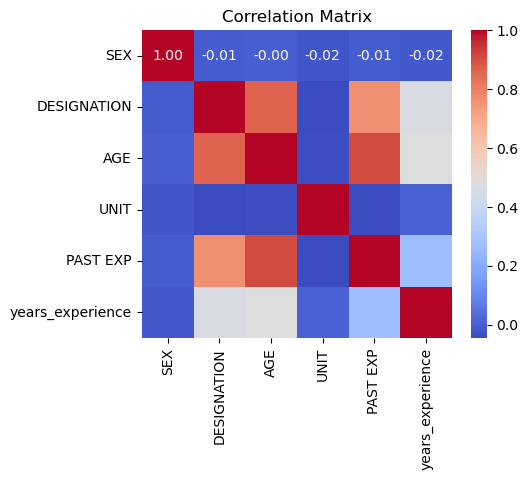

In [31]:
corr_matrix= x_train_new.corr(numeric_only=True)

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [32]:
# dropping columns with correlation exceeding [-0.8,0.8]
x_train = x_train.drop(columns=['AGE'])
x_test = x_test.drop(columns=['AGE'])

<h2> Decision Tree with Hyperparameter Tunning

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
para={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3],
    'max_features':['sqrt', 'log2','auto'],
    
}
from sklearn.model_selection import GridSearchCV
dtgrid=GridSearchCV(estimator=dt,param_grid=para,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
dtgrid.fit(x_train,y_train)
dtgrid.best_params_

{'criterion': 'absolute_error',
 'max_depth': 3,
 'max_features': 'auto',
 'splitter': 'random'}

In [42]:
trainpred=dtgrid.predict(x_train)
testpred=dtgrid.predict(x_test)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score
def scores(y, pred):
    mae = mean_absolute_error(y, pred)
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, pred)

    metrics = {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "R-squared (R2)": r2
    }

  

    return metrics

In [44]:
print("Train" ,scores(y_train,trainpred))
print("---------------------------------")
print("Test" ,scores(y_test,testpred))

Train {'Mean Absolute Error (MAE)': 6834.185121107266, 'Mean Squared Error (MSE)': 373620619.416955, 'Root Mean Squared Error (RMSE)': 19329.2684656444, 'R-squared (R2)': 0.7573357349611416}
---------------------------------
Test {'Mean Absolute Error (MAE)': 5982.493279569892, 'Mean Squared Error (MSE)': 147974351.50134408, 'Root Mean Squared Error (RMSE)': 12164.470868120163, 'R-squared (R2)': 0.8383467848410555}


<h2>Random Forest with Hyperparameter Tunning

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [61]:
para={
    'max_depth':[1],
    'max_features':[5,6,7,"auto",8,10],
    'min_samples_split':[2,4,6,8,10],
    'n_estimators':[25,50,100,200]
    
}

In [62]:
from sklearn.model_selection import RandomizedSearchCV
random=RandomizedSearchCV(estimator=rf,param_distributions=para, n_iter=100,cv=5,verbose=2,n_jobs=-1)
random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1],
                                        'max_features': [5, 6, 7, 'auto', 8,
                                                         10],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [25, 50, 100, 200]},
                   verbose=2)

In [64]:
random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'max_features': 6,
 'max_depth': 1}

In [65]:
trainpred=random.predict(x_train)
testpred=random.predict(x_test)

In [66]:
print("Train" ,scores(y_train,trainpred))
print("---------------------------------")
print("Test" ,scores(y_test,testpred))

Train {'Mean Absolute Error (MAE)': 9777.26017997942, 'Mean Squared Error (MSE)': 330260955.68064594, 'Root Mean Squared Error (RMSE)': 18173.083273914912, 'R-squared (R2)': 0.7854975664717341}
---------------------------------
Test {'Mean Absolute Error (MAE)': 9023.096465016204, 'Mean Squared Error (MSE)': 172089725.84675103, 'Root Mean Squared Error (RMSE)': 13118.297368437377, 'R-squared (R2)': 0.8120021666140167}


<h2>KNN with Hyperparameter Tunning

In [67]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()


In [68]:
para={
    "n_neighbors":[2,3,5,7,10,20,40,50,60,70,80,90,100],
    "weights":['uniform','distance'],
    "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [69]:
from sklearn.model_selection import GridSearchCV
knngrid=GridSearchCV(estimator=knn,param_grid=para,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
knngrid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 5, 7, 10, 20, 40, 50, 60, 70, 80,
                                         90, 100],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [70]:
knngrid.best_params_

{'algorithm': 'brute', 'n_neighbors': 7, 'weights': 'distance'}

In [72]:
trainpred=knngrid.predict(x_train)
testpred=knngrid.predict(x_test)

In [74]:
print("Train" ,scores(y_train,trainpred))
print("---------------------------------")
print("Test" ,scores(y_test,testpred))

Train {'Mean Absolute Error (MAE)': 324.3981161091887, 'Mean Squared Error (MSE)': 811373.8611591696, 'Root Mean Squared Error (RMSE)': 900.7629328292597, 'R-squared (R2)': 0.9994730177312023}
---------------------------------
Test {'Mean Absolute Error (MAE)': 6520.802780769684, 'Mean Squared Error (MSE)': 150719830.2953328, 'Root Mean Squared Error (RMSE)': 12276.800490980246, 'R-squared (R2)': 0.8353475118610016}


<h2>GradientBoostingRegressor

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [78]:
trainpred=gbr.predict(x_train)
testpred=gbr.predict(x_test)

In [79]:
print("Train" ,scores(y_train,trainpred))
print("---------------------------------")
print("Test" ,scores(y_test,testpred))

Train {'Mean Absolute Error (MAE)': 3566.792913437127, 'Mean Squared Error (MSE)': 24584753.521906998, 'Root Mean Squared Error (RMSE)': 4958.30147549612, 'R-squared (R2)': 0.9840323557252678}
---------------------------------
Test {'Mean Absolute Error (MAE)': 4095.5786472753975, 'Mean Squared Error (MSE)': 46005734.64804391, 'Root Mean Squared Error (RMSE)': 6782.752733812718, 'R-squared (R2)': 0.9497414596100595}


<h4>Among the above models Decision Tree gives us the best generalized output,that model trained using GridSearchCV in such way that it avoids the problem the overfitting.